# **Heatmap showing the Branchwise Attendance distribution**

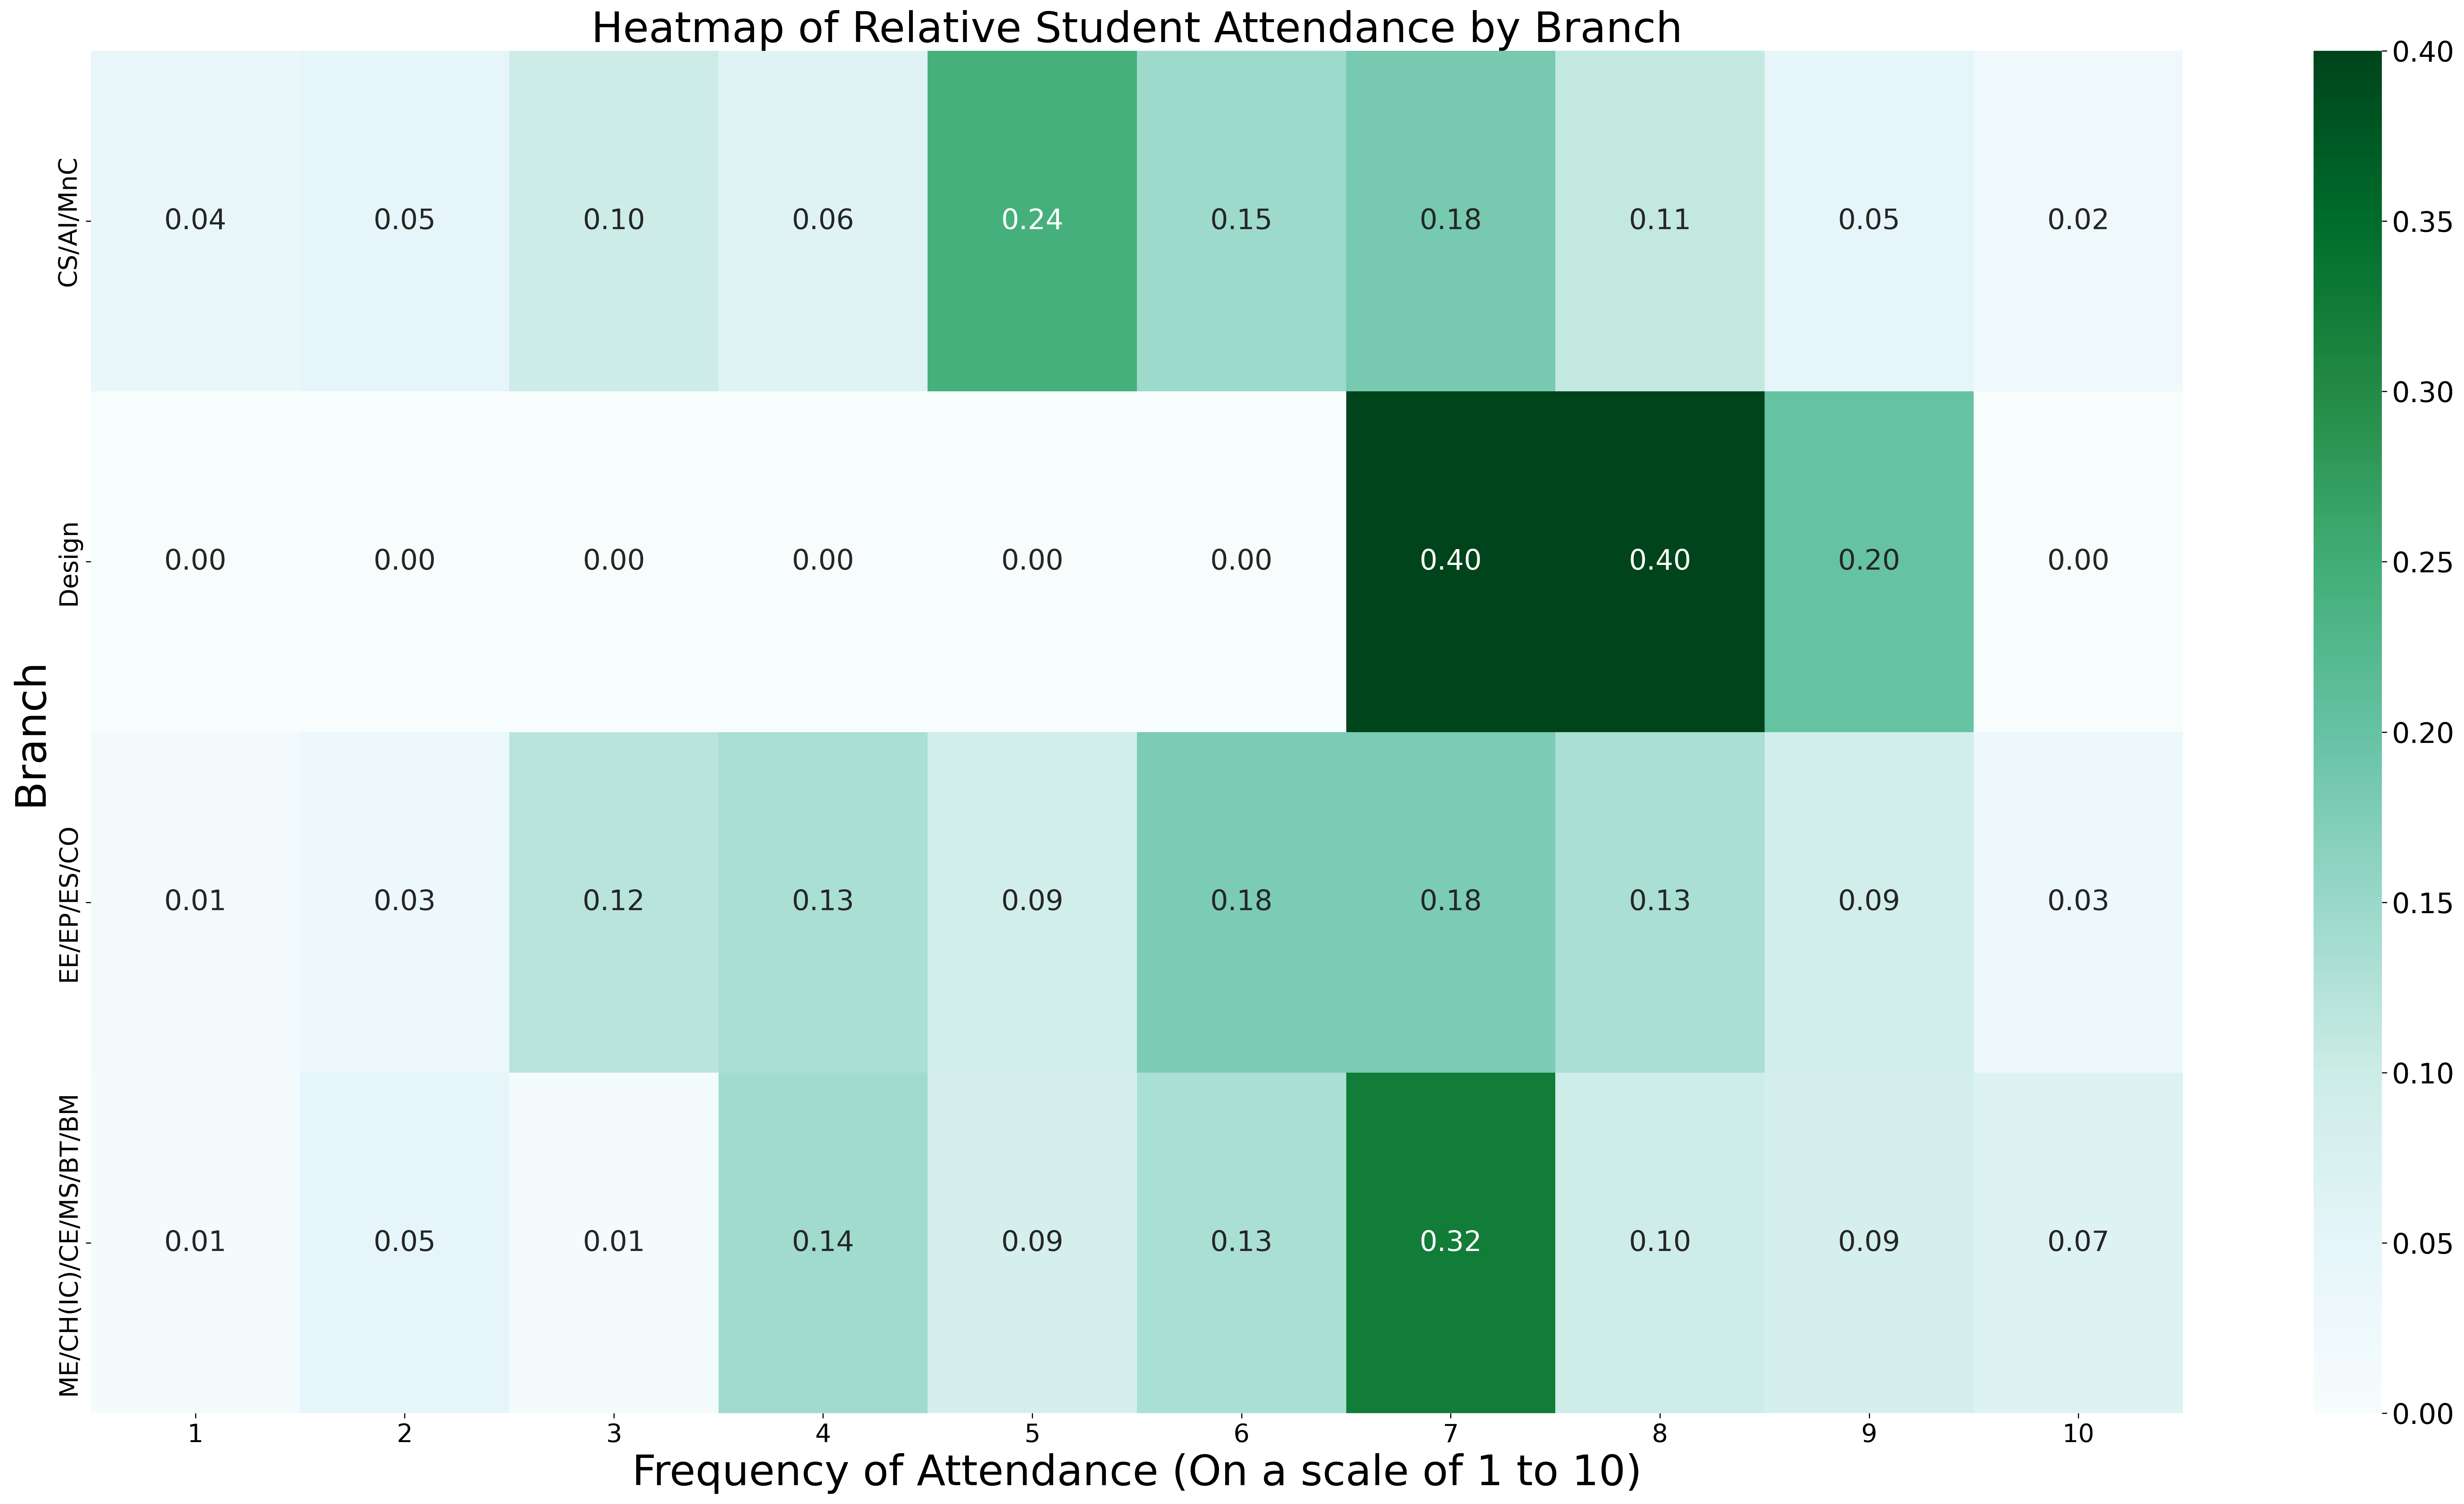

Branch-wise Variances:
Your Branch
CS/AI/MnC                0.005149
Design                   0.028889
EE/EP/ES/CO              0.003616
ME/CH(IC)/CE/MS/BT/BM    0.008188
dtype: float64


Your Branch
CS/AI/MnC                 82
Design                     5
EE/EP/ES/CO               67
ME/CH(IC)/CE/MS/BT/BM    105
dtype: int64

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Modified_Response.csv")
df = df[['Your Branch', 'No of Classes (On a scale of 1 to 10)']]
branch_totals = df.groupby('Your Branch').size()
pivot_table = df.pivot_table(index='Your Branch', columns='No of Classes (On a scale of 1 to 10)', aggfunc=len, fill_value=0)
normalized_pivot_table = pivot_table.div(branch_totals, axis=0)

plt.figure(figsize=(27, 15), dpi=300)   
heatmap = sns.heatmap(normalized_pivot_table, cmap="BuGn", annot=True, fmt=".2f", annot_kws={"size": 20})
plt.title("Heatmap of Relative Student Attendance by Branch", fontsize=30)
plt.xlabel("Frequency of Attendance (On a scale of 1 to 10)", fontsize=30)
plt.ylabel("Branch", fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

branch_variances = normalized_pivot_table.var(axis=1)

print("Branch-wise Variances:")
print(branch_variances)

branch_totals


# **Yearwise Variation in No. of courses opted by B.tech students**

Mean for 1st and 2nd years: 4.4880833610464475
Variance for 1st and 2nd years: 0.19976300602760377
Mean for 3rd and 4th years: 4.366071428571429
Variance for 3rd and 4th years: 1.0983737244897953


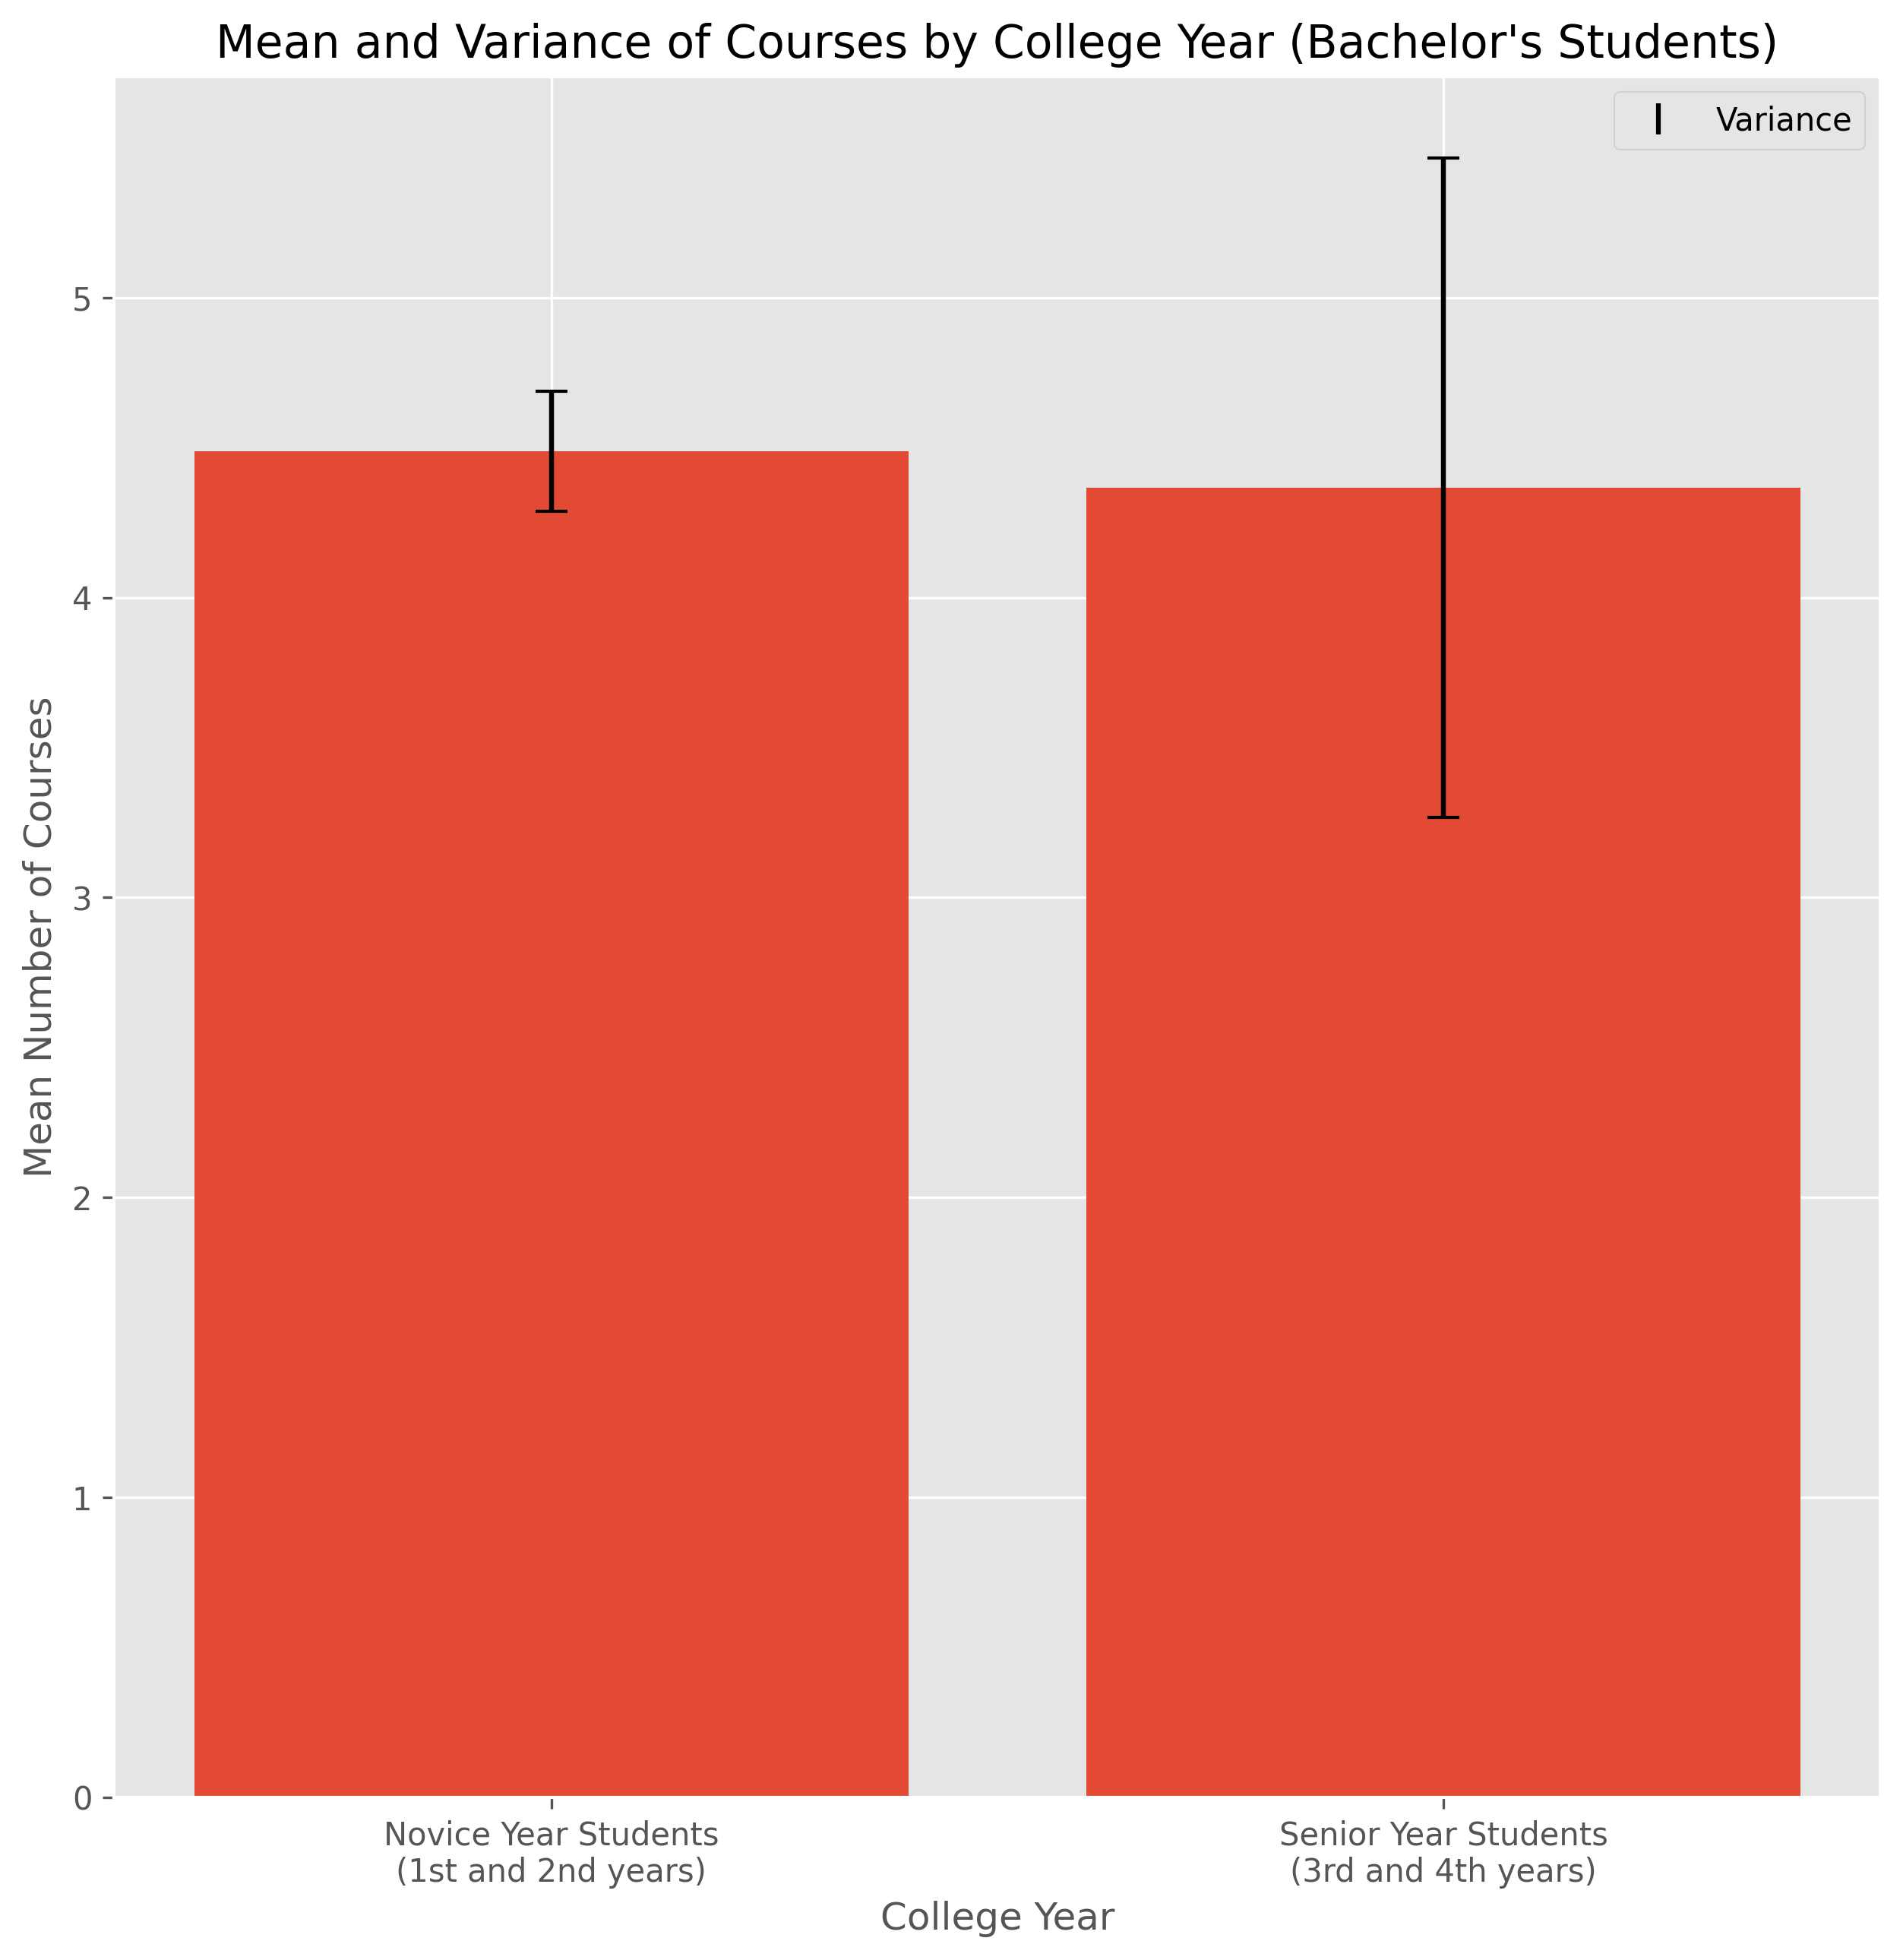

,No.of Courses
count,234.000000
mean,4.508547
std,1.753577
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,9.000000


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Modified_Response.csv')

data = data[['Programme','year','No.of Courses']]

data = data[data['Programme']=='Bachelors']

grouped_data = data.groupby('year')['No.of Courses']

group_1_2 = grouped_data.apply(lambda x: x.mean() if x.name in ['1st', '2nd'] else None).dropna()
mean_1_2 = group_1_2.mean()
variance_1_2 = group_1_2.var()

group_3_4 = grouped_data.apply(lambda x: x.mean() if x.name in ['3rd', '4th'] else None).dropna()
mean_3_4 = group_3_4.mean()
variance_3_4 = group_3_4.var()

print("Mean for 1st and 2nd years:", mean_1_2)
print("Variance for 1st and 2nd years:", variance_1_2)
print("Mean for 3rd and 4th years:", mean_3_4)
print("Variance for 3rd and 4th years:", variance_3_4)

plt.style.use('ggplot')
plt.figure(figsize=(10,10), dpi=300)
plt.bar(['Novice Year Students\n(1st and 2nd years)', 'Senior Year Students\n(3rd and 4th years)'], [mean_1_2, mean_3_4], yerr=[variance_1_2, variance_3_4], capsize=5)
plt.errorbar(['Novice Year Students\n(1st and 2nd years)', 'Senior Year Students\n(3rd and 4th years)'], [mean_1_2, mean_3_4], yerr=[variance_1_2, variance_3_4], fmt='none', ecolor='black', label='Variance')
plt.xlabel('College Year')
plt.ylabel('Mean Number of Courses')
plt.title('Mean and Variance of Courses by College Year (Bachelor\'s Students)')
plt.legend()
plt.show()

# len(data.index)
data.describe()

# **Correlation Analysis between No. of Mandatory courses and Student's Attendance.**

Correlation Coefficient: 0.7110403980073132


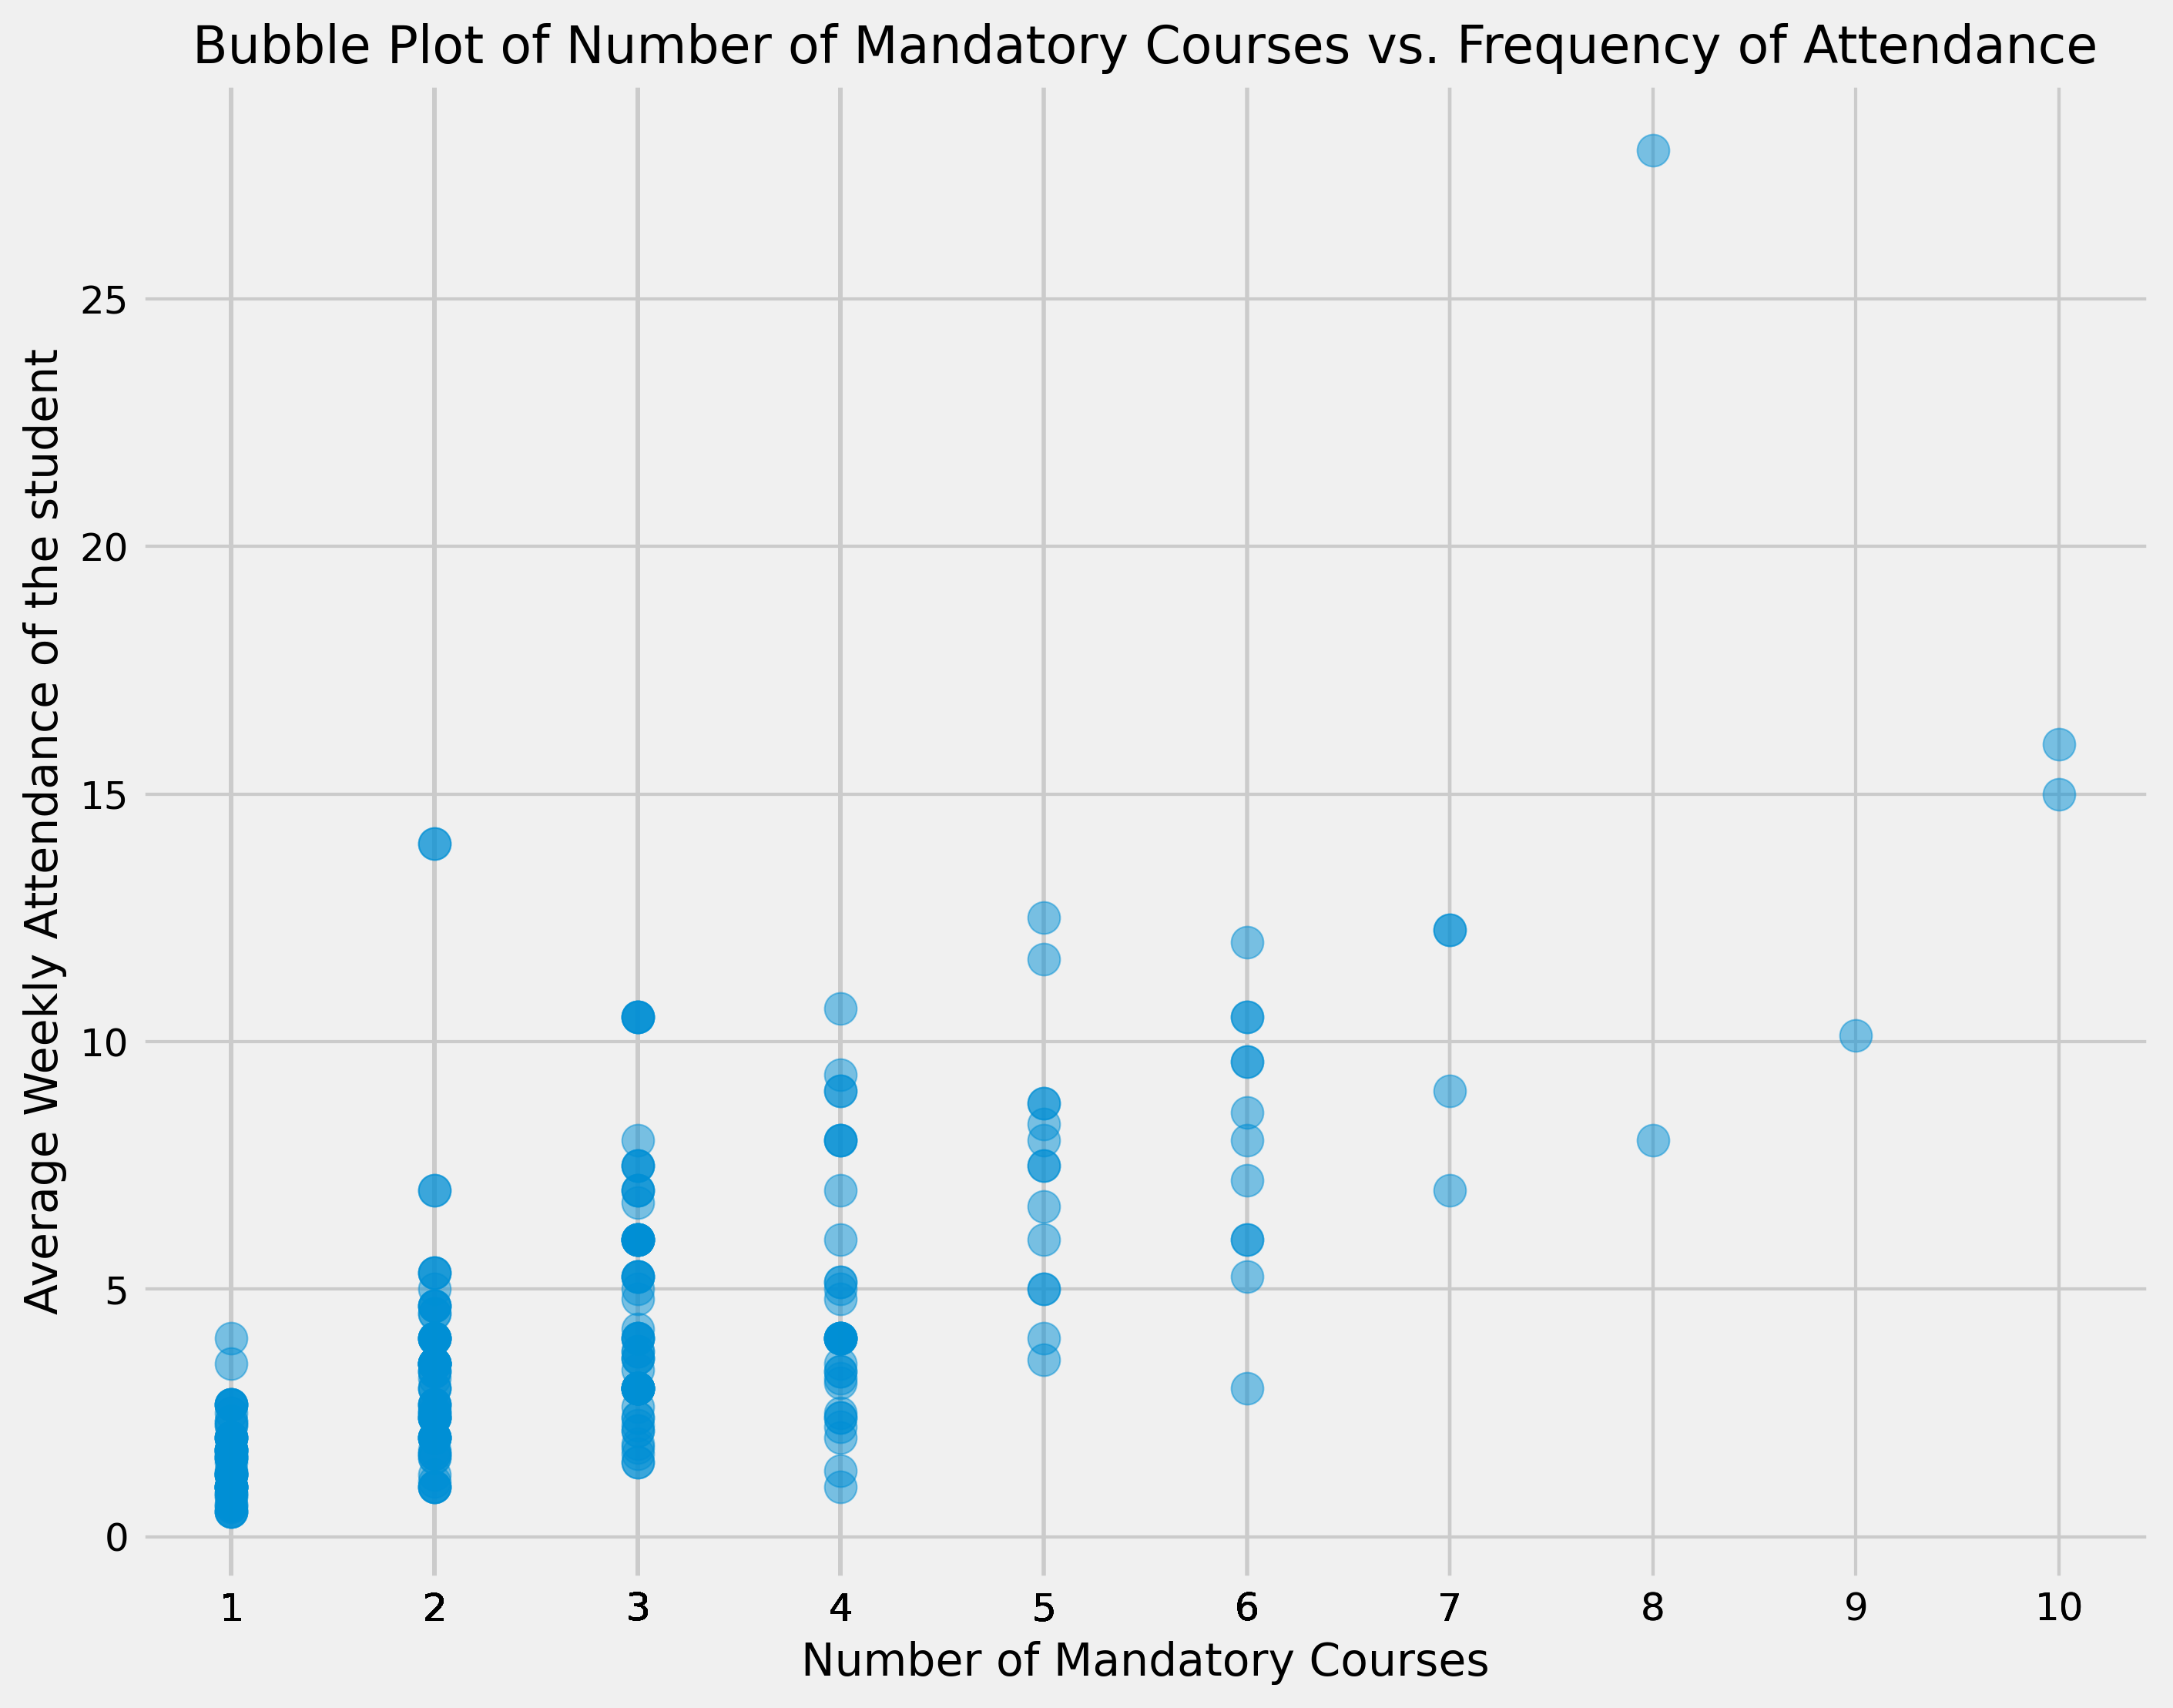

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

data = pd.read_csv('Modified_Response.csv')

courses_attendance = data[['How many courses do you have that has mandatory or random attendance, surprise quiz, marks on interaction etc?', 'No.of Courses','No of Classes']].copy()

courses_attendance['new'] = (courses_attendance['How many courses do you have that has mandatory or random attendance, surprise quiz, marks on interaction etc?'].astype(int) * 
                             courses_attendance['No of Classes'].astype(int) / 
                             courses_attendance['No.of Courses'].astype(int))

correlation_coefficient = courses_attendance['new'].corr(courses_attendance.iloc[:, 0])

print("Correlation Coefficient:", correlation_coefficient)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 8), dpi=300)
plt.scatter(x=courses_attendance.iloc[:, 0], y=courses_attendance['new'], s=100, alpha=0.5)
plt.title('Bubble Plot of Number of Mandatory Courses vs. Frequency of Attendance', fontsize=16)
plt.xlabel('Number of Mandatory Courses', fontsize=14)
plt.ylabel('Average Weekly Attendance of the student', fontsize=14)
plt.xticks(fontsize=12)
plt.xticks(ticks=courses_attendance.iloc[:, 0], labels=courses_attendance.iloc[:, 0], rotation=0)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()


In [4]:
# Manually computing the Correlation Coefficient

import pandas as pd

data = pd.read_csv('Modified_Response.csv')
courses_attendance = data[['How many courses do you have that has mandatory or random attendance, surprise quiz, marks on interaction etc?', 'No.of Courses','No of Classes']].copy()

# Perform element-wise multiplication and division to calculate 'new' column
courses_attendance['new'] = (courses_attendance['How many courses do you have that has mandatory or random attendance, surprise quiz, marks on interaction etc?'].astype(int) * 
                             courses_attendance['No of Classes'].astype(int) / 
                             courses_attendance['No.of Courses'].astype(int))

# Calculate mean of the two columns
mean_x = courses_attendance.iloc[:, 0].mean()
mean_y = courses_attendance.iloc[:, -1].mean()

# Calculate numerator and denominators
numerator = ((courses_attendance.iloc[:, 0] - mean_x) * (courses_attendance.iloc[:, -1] - mean_y)).sum()
denominator_x = ((courses_attendance.iloc[:, 0] - mean_x) ** 2).sum()
denominator_y = ((courses_attendance.iloc[:, -1] - mean_y) ** 2).sum()

# Calculate correlation coefficient
correlation_coefficient = numerator / (denominator_x ** 0.5 * denominator_y ** 0.5)

print("Manually Calculated Correlation Coefficient:", correlation_coefficient)


Manually Calculated Correlation Coefficient: 0.7110403980073132


# **Wake-Up Time Hypothesis Analysis - Plot and Computations**

Mean Wake-up Time for Male Students: 8.51063829787234
Mean Wake-up Time for Female Students: 8.373239436619718
Standard Deviation for Male Wake-up Times: 1.1422342385157822
Standard Deviation for Female Wake-up Times: 1.081395625566316


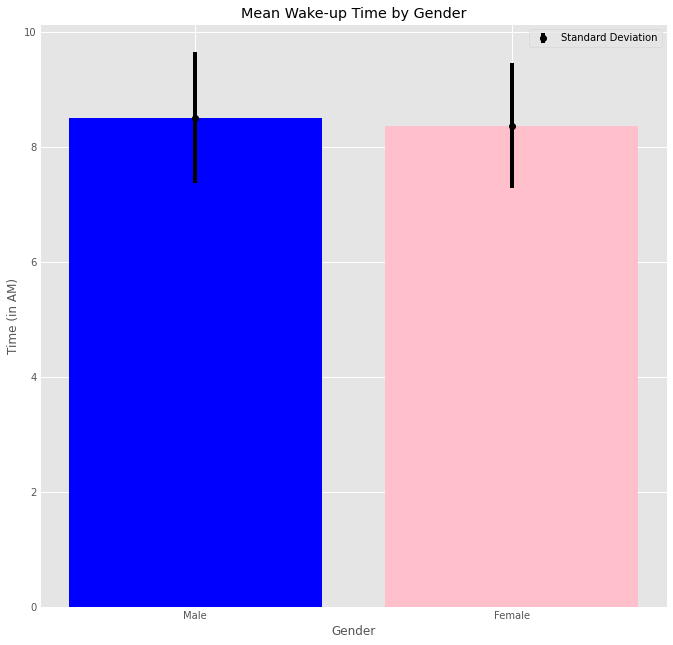

Ratio of Standard Deviations = 0.9467371832343952
Ratio of Means = 0.9838556338028169
Number of Male Students: 188
Number of Female Students: 71


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Modified_Response.csv")

time_mapping = {
    '6:00 am - 7:00 am': 6.5,
    '7:00 am - 8:00 am': 7.5,
    '8:00 am - 9:00 am': 8.5,
    '9:00 am - 10:00 am': 9.5,
    'After 10:00 am': 10.5
}
df['time_numeric'] = df['When do you wake up usually(weekdays)?'].map(time_mapping)

male_mean = df[df['Gender'] == 'Male']['time_numeric'].mean()
female_mean = df[df['Gender'] == 'Female']['time_numeric'].mean()
male_std = df[df['Gender'] == 'Male']['time_numeric'].std()
female_std = df[df['Gender'] == 'Female']['time_numeric'].std()

print("Mean Wake-up Time for Male Students:", male_mean)
print("Mean Wake-up Time for Female Students:", female_mean)
print("Standard Deviation for Male Wake-up Times:", male_std)
print("Standard Deviation for Female Wake-up Times:", female_std)

plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

plt.bar(['Male', 'Female'], [male_mean, female_mean], color=['blue', 'pink'])

plt.errorbar(['Male', 'Female'], [male_mean, female_mean], yerr=[male_std, female_std], fmt='o', color='black', label='Standard Deviation')

plt.title('Mean Wake-up Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Time (in AM)')
plt.legend()
plt.show()

ratio_sd = female_std / male_std
print(f'Ratio of Standard Deviations = {ratio_sd}')

ratio_means = female_mean / male_mean
print(f'Ratio of Means = {ratio_means}')

print("Number of Male Students:", len(df[df['Gender'] == 'Male']))
print("Number of Female Students:", len(df[df['Gender'] == 'Female']))
